In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Helium 

## Initialize matrix parser

/home/erdos/gits/4480/project1/python/../data/matrix_data.txt


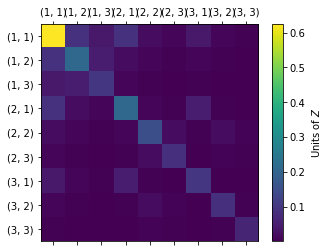

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fcb3e5b8828>)

In [3]:
from matrixelementparser import MatrixElementParser

Z = 4
matr = MatrixElementParser(Z=Z)
matr.show()

## Find reference energy

In [4]:
def Eref(Z):
    Eref = 0
    for i in range(Z):
        for j in range(Z):
            Eref += 0.5*matr[i, j, i, j]
        Eref += matr.onebody(i, i)
    return Eref

[print(Eref(z)) for z in range(1,4)]

-8.0
-13.5
-13.90877914951989


[None, None, None]

## Define hamiltonian up to singles-singles

In [5]:
n_states = 5

F = 4
core = np.arange(F)
n_virtual = 2
virtual = np.arange(n_virtual) + F

refs = [0,1]
nref = len(refs) # this code needs a bit of rework if the ground state is degenerate

singles = [] # [(0,2),(1,3),(0,4),(1,5)]

for i in core:
    for a in virtual:
        if (i%2) == (a%2):
            singles.append((i, a))
            
singles

[(0, 4), (1, 5), (2, 4), (3, 5)]

In [6]:
nsingles = len(singles)

ref_ref = np.zeros((1,1))
ref_sing = np.zeros((nsingles,1))
sing_sing = np.zeros((nsingles,nsingles))

ref_ref[0,0] = Eref(Z)
for ind1, (i, a) in enumerate(singles):
    for ind2, (j, b) in enumerate(singles):
        E = matr[a, j, i, b] 
        E += matr.onebody(a, b) if i==j else 0
        E -= matr.onebody(i, j) if a==b else 0
        E += Eref(Z) if (i==j and a==b) else 0
        sing_sing[ind1, ind2] = E
    
    ref_sing[ind1] = sum(matr[i, j, a, j] for j in core) + matr.onebody(i, a)

                    
H = np.block([[ref_ref, ref_sing.T],
              [ref_sing, sing_sing]])

e,v = np.linalg.eig(H)
print(H)
print('eigenvalues')
print(e)

[[-1.37159958e+01  1.89154018e-01  1.89154018e-01  4.45188367e-01
   4.45188367e-01]
 [ 1.89154018e-01 -6.97976262e+00  2.30712891e-02 -1.27925738e-03
   8.43615534e-03]
 [ 1.89154018e-01  2.30712891e-02 -6.97976262e+00  8.43615534e-03
  -1.27925738e-03]
 [ 4.45188367e-01 -1.27925738e-03  8.43615534e-03 -1.29114363e+01
   2.99040768e-02]
 [ 4.45188367e-01  8.43615534e-03 -1.27925738e-03  2.99040768e-02
  -1.29114363e+01]]
eigenvalues
[-14.06166423 -12.54660825  -6.94594686 -12.94135626  -7.00281801]


## Generalize code above into HartreeFock class

In [7]:
from hartreefock import HartreeFock

system = HartreeFock(Z=4)
print(system.Hamiltonian())

print(system.energy_states()[0])

ModuleNotFoundError: No module named 'hartreefock'